Randomized Benchmarking Results Summary:
Metric     Value                Uncertainty         
alpha      1.000000e+00         N/A                 
EPC        4.024392e-11         N/A                 
EPG_sxdg   4.632159e-11         N/A                 
EPG_u2     4.632159e-11         N/A                 
EPG_z      0.000000e+00         N/A                 
EPG_s      0.000000e+00         N/A                 
EPG_u3     9.264317e-11         N/A                 
EPG_x      4.632159e-11         N/A                 
EPG_u1     0.000000e+00         N/A                 
EPG_y      4.632159e-11         N/A                 
EPG_h      4.632159e-11         N/A                 


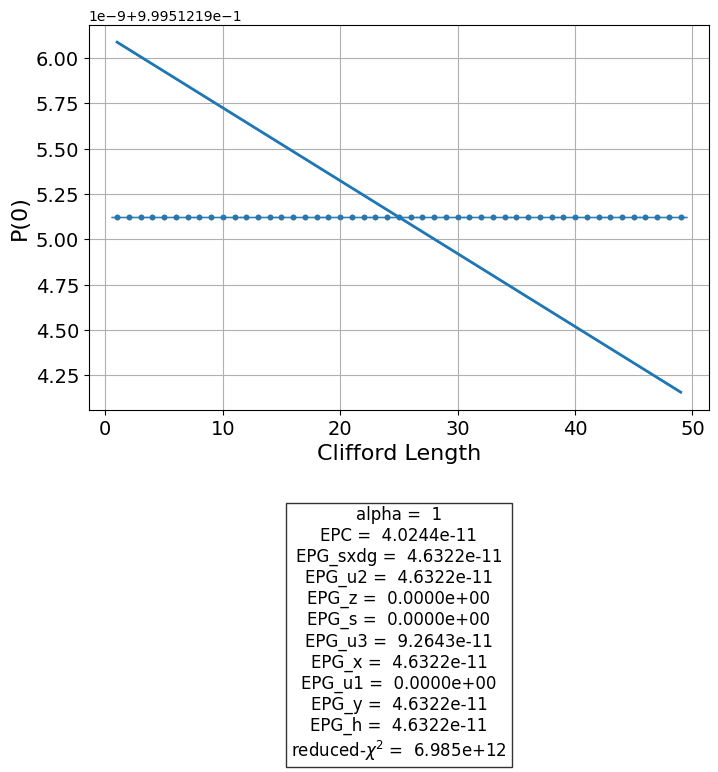

In [11]:
!pip install qiskit-aer qiskit-experiments
import numpy as np
from qiskit_aer import Aer
from qiskit_experiments.library import StandardRB
from qiskit_experiments.framework import ExperimentData
from IPython.display import display # Import display
# Define parameters
qubits = (0,) # Target qubit(s)
lengths = list(range(1, 50)) # Sequence lengths to test
num_samples = 3 # Number of random sequences per length
seed = 42 # Random seed for reproducibility
# Setup the RB experiment
rb_experiment = StandardRB(physical_qubits=qubits, lengths=lengths,
                           num_samples=num_samples, seed=seed)

# Use Aer simulator backend
backend = Aer.get_backend('aer_simulator')
# Run the experiment
exp_data: ExperimentData = rb_experiment.run(backend).block_for_results()
# Retrieve analysis results as a DataFrame
analysis_results_df = exp_data.analysis_results(dataframe=True)
# Organize and print key results from the DataFrame
print("Randomized Benchmarking Results Summary:")
print(f"{'Metric':<10} {'Value':<20} {'Uncertainty':<20}")
# Iterate through the DataFrame rows
for index, row in analysis_results_df.iterrows():
    name = row['name']
    value = row['value']
    error = row['standard_error'] if 'standard_error' in row and not np.isnan(row['standard_error']) else "N/A" # Access standard_error if it exists
    # Check if the value is a ParameterValue object and extract nominal_value
    if hasattr(value, 'nominal_value'):
        value = value.nominal_value
    if hasattr(error, 'nominal_value'):
        error = error.nominal_value
    print(f"{name:<10} {value:<20.6e} {error:<20s}")
# Plot RB decay figure
fig = exp_data.figure(0)
display(fig) # Explicitly display the figure